import libraries

In [13]:
from ultralytics import YOLO
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io
import cv2
import  numpy as np
import matplotlib.pyplot as plt

provide input image

FileUpload(value=(), accept='image/*', description='Upload')

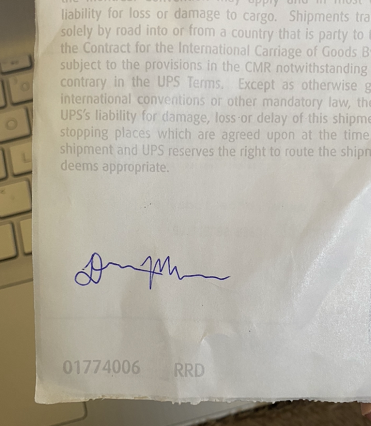

In [ ]:
uploaded_img = None

upload_btn = widgets.FileUpload(
    accept='image/*',
    multiple=False
)

def on_upload_change(change):
    global uploaded_img
    for file_info in upload_btn.value:
        name = file_info['name']
        uploaded_img = Image.open(io.BytesIO(file_info['content']))
        print(f"Image '{name}' uploaded.")
        display(uploaded_img)

upload_btn.observe(on_upload_change, names='value')
display(upload_btn)

predict image and show prediction result


0: 640x576 1 signature, 77.0ms
Speed: 3.3ms preprocess, 77.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 576)


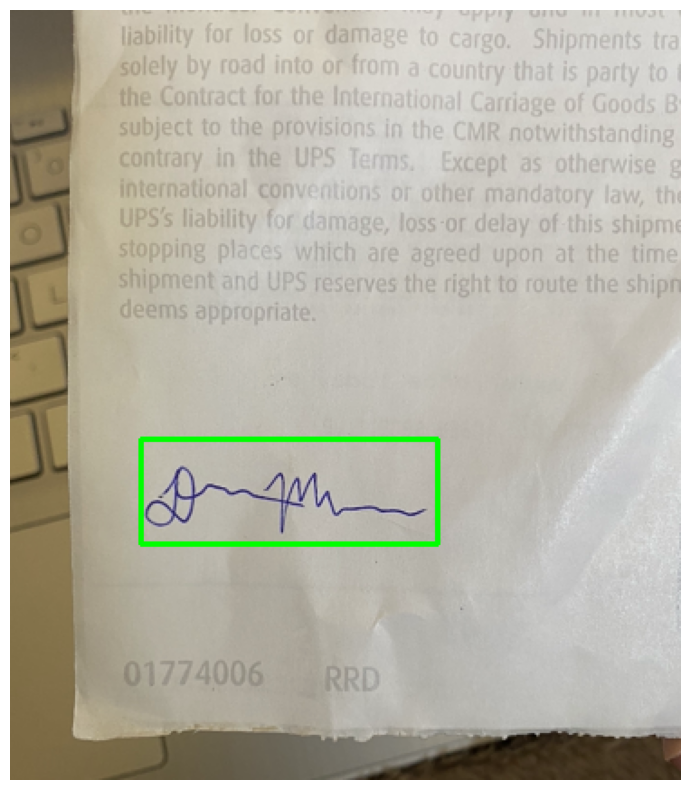

In [18]:
if uploaded_img is not None:
    img = np.array(uploaded_img.convert("RGB"))
    img_cv2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    model = YOLO("best.pt")

    results = model(img_cv2)[0]

    for box in results.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(img_cv2, (x1, y1), (x2, y2), (0, 255, 0), 2)

    img_display = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(img_display)
    plt.axis('off')
    plt.show()

else:
    print("No image uploaded yet.")